# US Gun Deaths 1999 - 2019

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import missingno as msno
import autoreload
import csv
import warnings
import os
import sys

from collections import defaultdict, Counter

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

sb.set()
sb.set_style('darkgrid')

plt.style.use('fivethirtyeight')
plt.tight_layout()

%matplotlib inline
%reload_ext autoreload
%autoreload 2

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"D:\Open Classroom\Datasets\US Gun deaths by County 1999-2019\gun_deaths_us_1999_2019.csv")
df.head()

,Unnamed: 0,Year,County,County Code,State,State_Name,State Code,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Age Adjusted Rate,Age Adjusted Rate Lower 95% Confidence Interval,Age Adjusted Rate Upper 95% Confidence Interval
0,0,1999,Baldwin County,1003,AL,Alabama,1,22,137555,15.99,10.02,24.21,16.28,10.20,24.64
1,1,1999,Calhoun County,1015,AL,Alabama,1,29,114910,25.24,16.90,36.24,25.21,16.89,36.21
2,2,1999,Chambers County,1017,AL,Alabama,1,10,36527,NaN,13.13,50.35,NaN,12.91,49.51
3,3,1999,Colbert County,1033,AL,Alabama,1,14,54715,NaN,13.99,42.93,NaN,13.54,41.57
4,4,1999,Dallas County,1047,AL,Alabama,1,11,46722,NaN,11.75,42.13,NaN,12.15,43.54


In [4]:
df.shape

(14358, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14358 entries, 0 to 14357
Data columns (total 15 columns):
Unnamed: 0                                         14358 non-null int64
Year                                               14358 non-null int64
County                                             14358 non-null object
County Code                                        14358 non-null int64
State                                              14358 non-null object
State_Name                                         14358 non-null object
State Code                                         14358 non-null int64
Deaths                                             14358 non-null int64
Population                                         14358 non-null int64
Crude Rate                                         6871 non-null float64
Crude Rate Lower 95% Confidence Interval           14358 non-null float64
Crude Rate Upper 95% Confidence Interval           14358 non-null float64
Age Adjusted Rate  

In [6]:
round(df.describe(), 2)

,Unnamed: 0,Year,County Code,State Code,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Age Adjusted Rate,Age Adjusted Rate Lower 95% Confidence Interval,Age Adjusted Rate Upper 95% Confidence Interval
count,14358.00,14358.00,14358.00,14358.00,14358.00,14358.00,6871.00,14358.00,14358.00,6871.00,14358.00,14358.00
mean,7178.50,2009.73,29281.21,29.19,37.98,348375.16,13.02,8.71,22.16,12.87,8.50,22.18
std,4144.94,6.09,15964.11,15.94,67.03,604948.43,6.75,4.98,13.84,6.71,4.90,14.19
min,0.00,1999.00,1001.00,1.00,10.00,7459.00,1.35,0.55,1.72,1.30,0.55,1.64
25%,3589.25,2005.00,13217.00,13.00,13.00,92779.50,8.47,5.34,13.10,8.43,5.20,13.15
50%,7178.50,2010.00,30063.00,30.00,19.00,168510.00,12.00,7.83,19.08,11.83,7.62,18.94
75%,10767.75,2015.00,42081.00,42.00,36.00,374863.75,16.17,11.03,27.66,15.98,10.69,27.52
max,14357.00,2019.00,56037.00,56.00,1273.00,10170292.00,69.95,64.29,246.55,79.11,62.36,258.88


In [7]:
df.isnull().sum()

Unnamed: 0                                            0
Year                                                  0
County                                                0
County Code                                           0
State                                                 0
State_Name                                            0
State Code                                            0
Deaths                                                0
Population                                            0
Crude Rate                                         7487
Crude Rate Lower 95% Confidence Interval              0
Crude Rate Upper 95% Confidence Interval              0
Age Adjusted Rate                                  7487
Age Adjusted Rate Lower 95% Confidence Interval       0
Age Adjusted Rate Upper 95% Confidence Interval       0
dtype: int64

In [11]:
df['Crude Rate'].replace(np.nan, np.mean(df['Crude Rate']), inplace = True)
df['Age Adjusted Rate'].replace(np.nan, np.mean(df['Age Adjusted Rate']), inplace = True)

Text(0.5, 1, 'Pearson Correlation Between Column Variables')

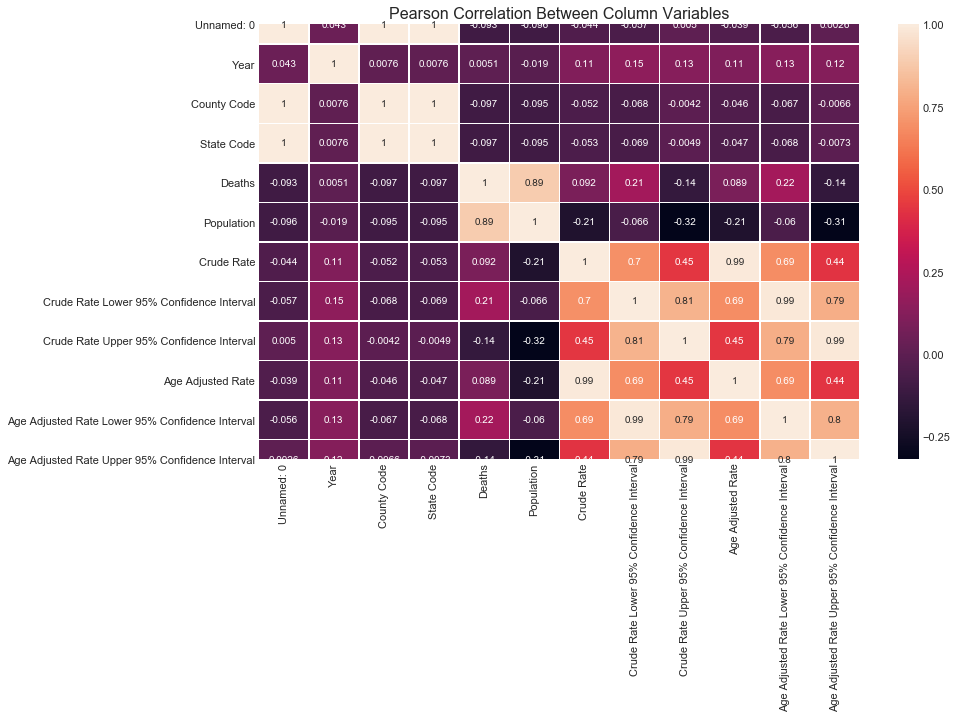

In [15]:
plt.figure(figsize = (12, 8))
sb.heatmap(df.corr(), annot = True, linewidths=0.5)
plt.title('Pearson Correlation Between Column Variables', fontdict = {'size': 16})

In [16]:
df.head()

,Unnamed: 0,Year,County,County Code,State,State_Name,State Code,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Age Adjusted Rate,Age Adjusted Rate Lower 95% Confidence Interval,Age Adjusted Rate Upper 95% Confidence Interval
0,0,1999,Baldwin County,1003,AL,Alabama,1,22,137555,15.990000,10.02,24.21,16.280000,10.20,24.64
1,1,1999,Calhoun County,1015,AL,Alabama,1,29,114910,25.240000,16.90,36.24,25.210000,16.89,36.21
2,2,1999,Chambers County,1017,AL,Alabama,1,10,36527,13.016642,13.13,50.35,12.868769,12.91,49.51
3,3,1999,Colbert County,1033,AL,Alabama,1,14,54715,13.016642,13.99,42.93,12.868769,13.54,41.57
4,4,1999,Dallas County,1047,AL,Alabama,1,11,46722,13.016642,11.75,42.13,12.868769,12.15,43.54


In [18]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

Text(0.5, 1.0, 'Top 20 Highest Death Rate occurence per County \nbetween 1999 - 2019')

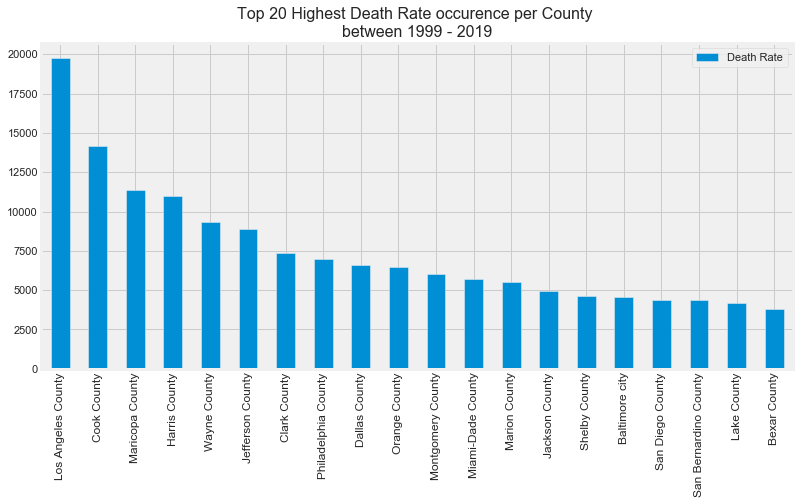

In [41]:
plt.figure(figsize = (12, 6))
county = df.groupby('County')
county['Deaths'].sum().sort_values(ascending = False).head(20).plot(kind='bar', label = 'Death Rate')
plt.xlabel(None)
plt.xticks(fontsize = 12)
plt.legend(loc = 'best')
plt.title('Top 20 Highest Death Rate occurence per County \nbetween 1999 - 2019', fontdict = {'size': 16})

Text(0.5, 1.0, 'Top 20 Highest Death Rate occurence per State \nbetween 1999 - 2019')

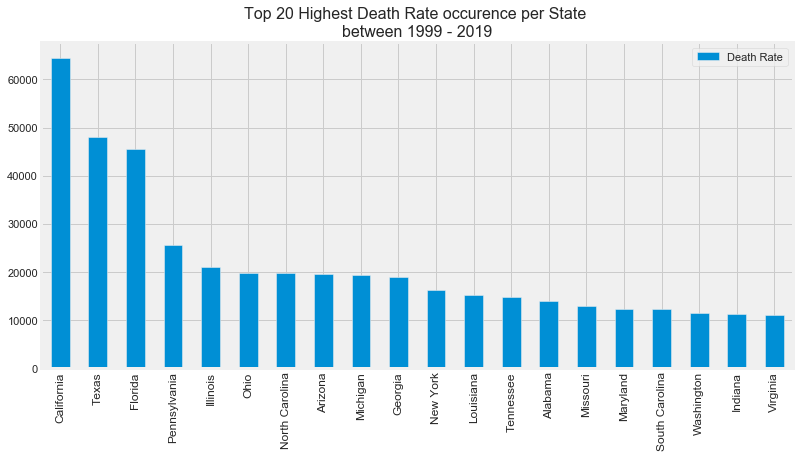

In [40]:
plt.figure(figsize = (12, 6))
state = df.groupby('State_Name')
state['Deaths'].sum().sort_values(ascending = False).head(20).plot(kind='bar', label = 'Death Rate')
plt.xlabel(None)
plt.xticks(fontsize = 12)
plt.legend(loc = 'best')
plt.title('Top 20 Highest Death Rate occurence per State \nbetween 1999 - 2019', fontdict = {'size': 16})

Text(0.5, 1.0, 'Death Rate occurence Yearly \nbetween 1999 - 2019')

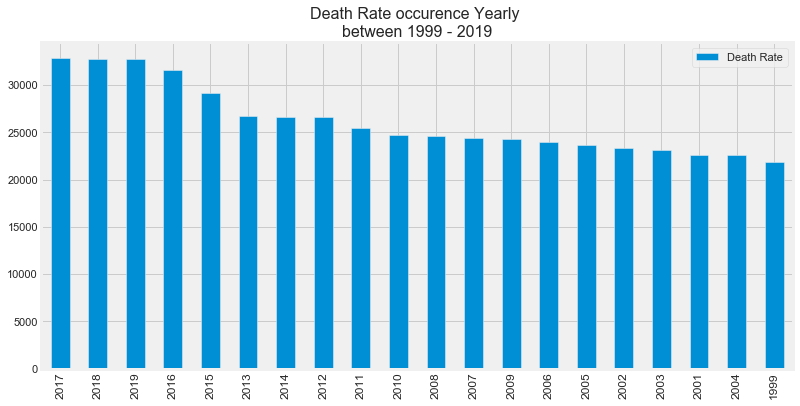

In [49]:
plt.figure(figsize = (12, 6))
year = df.groupby('Year')
year['Deaths'].sum().sort_values(ascending = False).head(20).plot(kind='bar', label = 'Death Rate')
plt.xlabel(None)
plt.xticks(fontsize = 12)
plt.legend(loc = 'best')
plt.title('Death Rate occurence Yearly \nbetween 1999 - 2019', fontdict = {'size': 16})